In [37]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import seaborn as sns
import data_preprocessing.normalize as normalize
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge,LassoCV

In [38]:
train_data = pd.read_csv('../data/input/train.csv')
test_data = pd.read_csv('../data/input/test.csv')

In [39]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [40]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [41]:
train_data.shape

(1460, 81)

In [42]:
test_data.shape

(1459, 80)

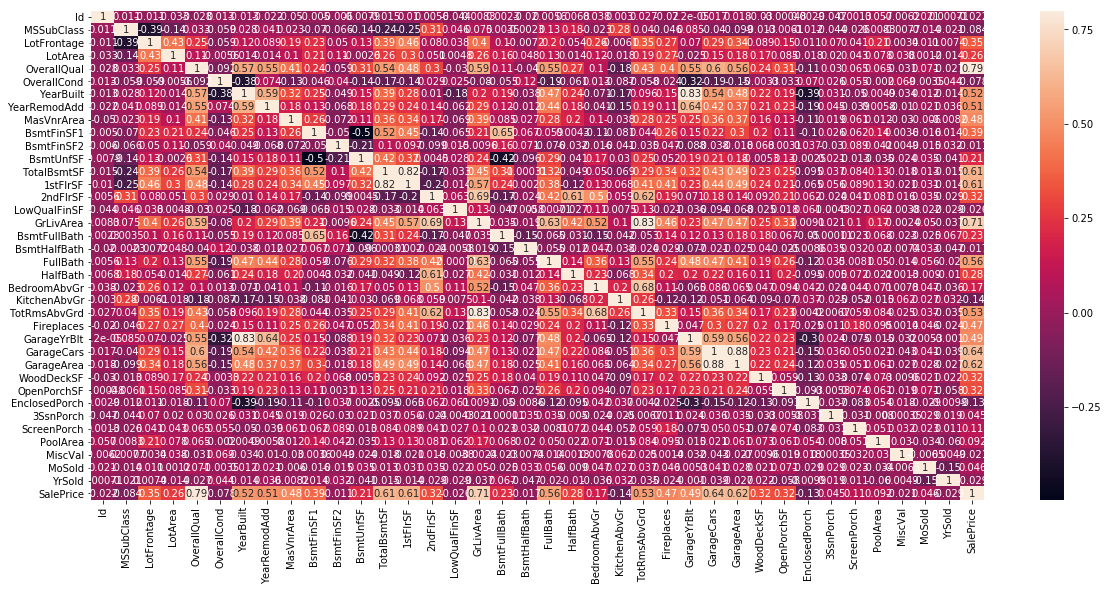

In [43]:
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(20,9))
sns.heatmap(corrmat,vmax = .8, annot=True);
plt.show()

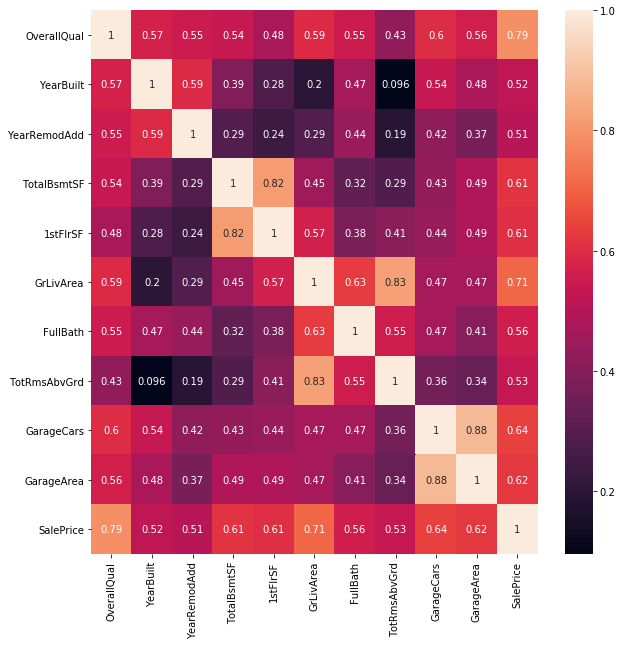

In [44]:
corrmat = train_data.corr()
topCorrelatedFeatures = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10));
g = sns.heatmap(train_data[topCorrelatedFeatures].corr(),annot=True);
plt.show()

Highly correlated features with Sales Price are - 

corrmat = train_data.corr()
corrmat.sort_values(["SalePrice"],ascending=False,inplace = True)
print(corrmat.SalePrice)

In [45]:
#remove highly correlated features
train_data = normalize.remove_correlated_features(train_data)

# handle missing data
train_data = normalize.drop_cols_with_missing_data(train_data)

#remove highly correlated features
test_data = normalize.remove_correlated_features(test_data)

# handle missing data
test_data = normalize.drop_cols_with_missing_data(test_data)

TrainDataWithNumber = train_data.select_dtypes(include=[np.number])
TestDataWithNumber = test_data.select_dtypes(include=[np.number])

In [46]:
TrainDataWithNumber.head();
TestDataWithNumber.head();

In [47]:
TrainDataWithNumber.shape

(1459, 32)

In [48]:
TestDataWithNumber.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,11622,5,6,1961,1961,468.0,144.0,270.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,14267,6,6,1958,1958,923.0,0.0,406.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,13830,5,5,1997,1998,791.0,0.0,137.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,9978,6,6,1998,1998,602.0,0.0,324.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,5005,8,5,1992,1992,263.0,0.0,1017.0,...,506.0,0,82,0,0,144,0,0,1,2010


* SalePrice        1.000000
* OverallQual      0.790982
* GrLivArea        0.708624
* GarageCars       0.640409
* GarageArea       0.623431
* TotalBsmtSF      0.613581
* 1stFlrSF         0.605852
* FullBath         0.560664
* TotRmsAbvGrd     0.533723
* YearBuilt        0.522897
* YearRemodAdd     0.507101

In [51]:
TrainDataWithNumber.shape

(1459, 32)

In [52]:
trainX = TrainDataWithNumber.drop(['SalePrice'], axis=1)
trainX.drop(['Id'],axis =1,inplace=True)
y = np.log1p(TrainDataWithNumber['SalePrice'])

In [53]:
trainX.shape

(1459, 30)

In [54]:
y.shape

(1459,)

In [55]:
X_train,X_test,y_train,y_test = train_test_split(trainX,y,test_size = 0.3,random_state= 0)

In [56]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1021, 30), (438, 30), (1021,), (438,))

In [57]:
X_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1454,20,7500,7,5,2004,2005,410,0,811,1221,...,400,0,113,0,0,0,0,0,10,2009
1099,20,11880,7,5,1978,1978,704,0,567,1601,...,478,0,0,0,0,0,0,0,4,2009
416,60,7844,6,7,1978,1978,209,0,463,672,...,440,0,0,0,0,0,0,0,3,2006
1168,70,13728,6,7,1935,1986,626,0,501,1236,...,540,0,0,0,0,90,0,0,7,2008
670,60,8633,6,5,2005,2005,193,0,545,738,...,540,100,35,0,0,0,0,0,2,2009


In [58]:
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
lr.score(X_test,y_test)

0.86878739679120043

In [60]:
all_data = pd.concat((train_data.loc[:,'MSSubClass':'SaleCondition'],
                      test_data.loc[:,'MSSubClass':'SaleCondition']))

Replace the missing values with mean of the column

In [61]:
train_data["SalePrice"] = np.log1p(train_data["SalePrice"])
all_data = pd.get_dummies(all_data)
all_data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,706.0,0.0,150.0,856,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,978.0,0.0,284.0,1262,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,486.0,0.0,434.0,920,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,216.0,0.0,540.0,961,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,655.0,0.0,490.0,1145,...,0,0,0,1,0,0,0,0,1,0


Filling the missing data with the mean of the column

In [63]:
trainX = all_data[:train_data.shape[0]]
testX = all_data[train_data.shape[0]:]
y = train_data.SalePrice

Using ridge regression on the dataset

In [64]:
trainX.shape

(1459, 217)

In [65]:
testX.shape

(1459, 217)

In [66]:
all_data.shape

(2918, 217)

In [67]:
X_train,X_test,y_train,y_test = train_test_split(trainX,y,test_size = 0.3,random_state= 0)

In [68]:
ridge_clf = Ridge(alpha=1.0)

In [69]:
ridge_clf.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [70]:
ridge_clf.score(X_test,y_test)

0.8754216832750723

In [71]:
lasso_clf = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(trainX, y)

c:\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


//TODO - Check convergence with alpha later

In [72]:
lasso_clf.score(X_test,y_test)

0.92285459834492767

//TODO - High score does not seems accurate, check this later